## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [3]:
# Load the dataset
bike_rental_df = pd.read_csv('bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

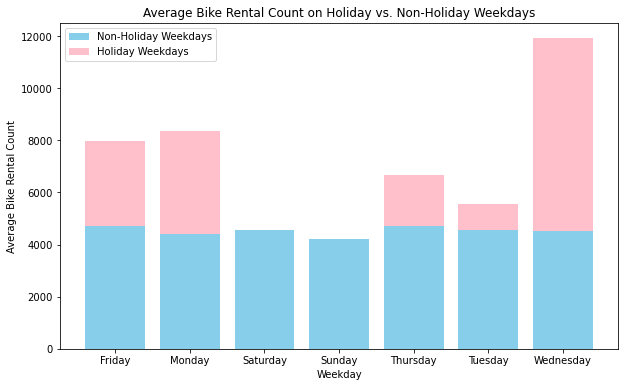

In [4]:
### Code here

# Group the data by 'holiday' and 'weekday' and calculate the average rental count
avg_counts = bike_rental_df.groupby(['holiday', 'weekday'])['count'].mean().reset_index()

# Filter data for non-holiday weekdays (holiday=False)
non_holiday_avg = avg_counts[avg_counts['holiday'] == 'No']

# Filter data for holiday weekdays (holiday=True)
holiday_avg = avg_counts[avg_counts['holiday'] == 'Yes']

result = pd.merge(non_holiday_avg, holiday_avg, on='weekday', how='outer')

# Create a bar chart to compare average counts
plt.figure(figsize=(10, 6))
plt.bar(result['weekday'], result['count_x'], label='Non-Holiday Weekdays', color='skyblue')
plt.bar(result['weekday'], result['count_y'], bottom = result['count_x'], label='Holiday Weekdays', color='pink')
plt.xlabel('Weekday')
plt.ylabel('Average Bike Rental Count')
plt.title('Average Bike Rental Count on Holiday vs. Non-Holiday Weekdays')
plt.legend()
plt.show()

In [6]:
### Comment here


<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month 
2. season
3. working_day
4. weather
<b></b>

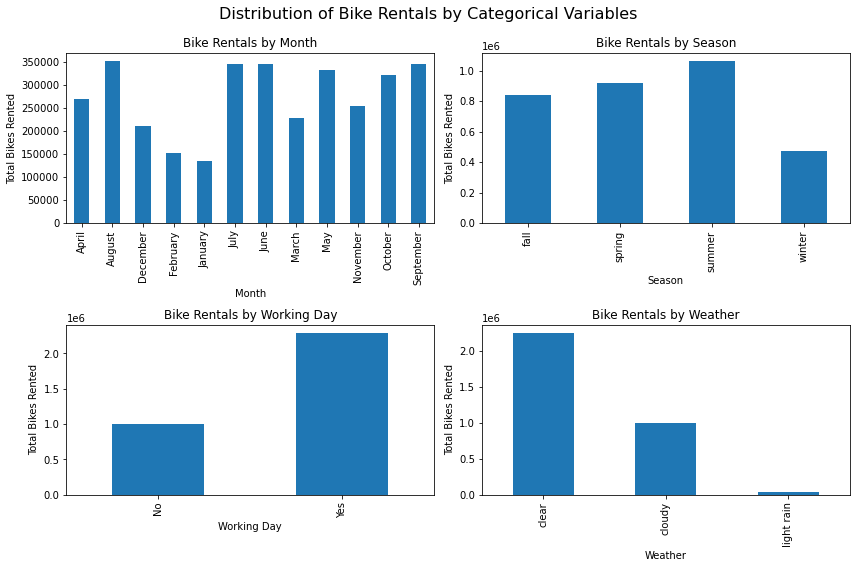

In [7]:
### Code here

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Bike Rentals by Categorical Variables', fontsize=16)

# Sum of 'count' by month
bike_rental_df.groupby('month')['count'].sum().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Bike Rentals by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Bikes Rented')

# Sum of 'count' by season
bike_rental_df.groupby('season')['count'].sum().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Bike Rentals by Season')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Total Bikes Rented')

# Sum of 'count' by working_day
bike_rental_df.groupby('working_day')['count'].sum().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Bike Rentals by Working Day')
axes[1, 0].set_xlabel('Working Day')
axes[1, 0].set_ylabel('Total Bikes Rented')

# Sum of 'count' by weather
bike_rental_df.groupby('weather')['count'].sum().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Bike Rentals by Weather')
axes[1, 1].set_xlabel('Weather')
axes[1, 1].set_ylabel('Total Bikes Rented')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

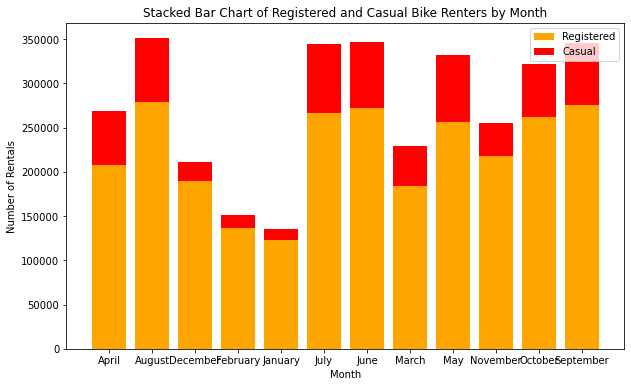

In [8]:
### Code here

grouped = bike_rental_df.groupby('month').sum()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the 'registered' bars
plt.bar(grouped.index, grouped['registered'], label='Registered', color='orange')

# Plot the 'casual' bars on top of 'registered'
plt.bar(grouped.index, grouped['casual'], label='Casual', color='red', bottom=grouped['registered'])

plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Stacked Bar Chart of Registered and Casual Bike Renters by Month')
plt.legend()
plt.show()

<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

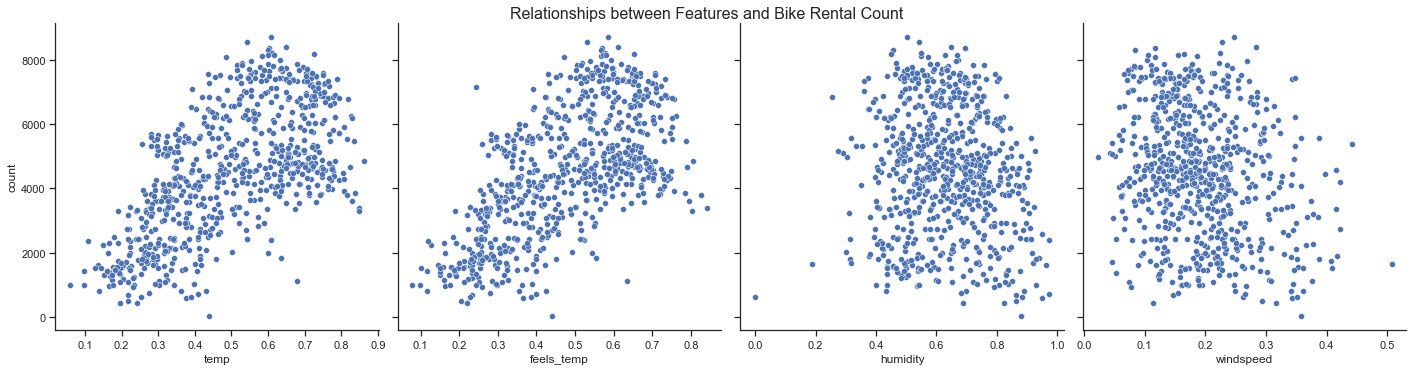

In [9]:
### Code here

# Create a small multiple of scatter plots
sns.set(style="ticks")
sns.pairplot(bike_rental_df, x_vars=['temp', 'feels_temp', 'humidity', 'windspeed'], y_vars=['count'], height=5)

# Set titles for each plot
plt.suptitle("Relationships between Features and Bike Rental Count", y=1.02, fontsize=16)

# Show the plots
plt.show()

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time. 

In [10]:
# split data into features and labels

bike_rental_X = bike_rental_df.drop(columns=['count'])
bike_rental_y = bike_rental_df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

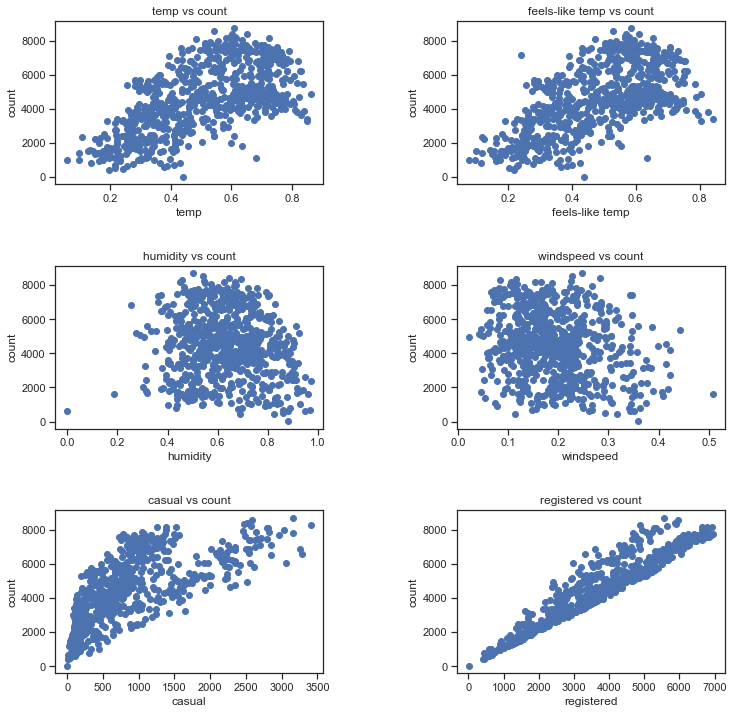

In [11]:
### Code here

fig, axs = plt.subplots(3, 2, figsize = (12, 12))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

axs[0, 0].scatter(bike_rental_X['temp'], bike_rental_y)
axs[0, 0].set_title('temp vs count')
axs[0, 0].set_xlabel('temp')
axs[0, 0].set_ylabel('count')

axs[0, 1].scatter(bike_rental_X['feels_temp'], bike_rental_y)
axs[0, 1].set_title('feels-like temp vs count')
axs[0, 1].set_xlabel('feels-like temp')
axs[0, 1].set_ylabel('count')

axs[1, 0].scatter(bike_rental_X['humidity'], bike_rental_y)
axs[1, 0].set_title('humidity vs count')
axs[1, 0].set_xlabel('humidity')
axs[1, 0].set_ylabel('count')

axs[1, 1].scatter(bike_rental_X['windspeed'], bike_rental_y)
axs[1, 1].set_title('windspeed vs count')
axs[1, 1].set_xlabel('windspeed')
axs[1, 1].set_ylabel('count')

axs[2, 0].scatter(bike_rental_X['casual'], bike_rental_y)
axs[2, 0].set_title('casual vs count')
axs[2, 0].set_xlabel('casual')
axs[2, 0].set_ylabel('count')

axs[2, 1].scatter(bike_rental_X['registered'], bike_rental_y)
axs[2, 1].set_title('registered vs count')
axs[2, 1].set_xlabel('registered')
axs[2, 1].set_ylabel('count');

**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [12]:
### Comment here


### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [13]:
bike_rental_X.drop(columns =['casual', 'registered'], inplace = True)
bike_rental_X

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754


In [14]:
### Code here

num_features = ['temp',
                'feels_temp',
                'humidity',
                'windspeed',
#                 'casual',
#                 'registered'
               ]

cat_features = ['month',
                'season',
                'holiday',
                'weekday',
                'working_day',
                'weather']

In [15]:
### Code here

encoder_bike_rental = OrdinalEncoder()
bike_rental_X[cat_features] = encoder_bike_rental.fit_transform(bike_rental_X[cat_features])

**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

/var/folders/yr/pvzhzlb12ggccgzxtvy9vwjh0000gn/T/ipykernel_32944/1246207575.py:7: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  list(bike_rental_corr[abs(bike_rental_corr) >= 0.9].where(np.triu(np.ones(bike_rental_corr.shape), k = 1).astype(np.bool8)).stack().index)


[('temp', 'feels_temp')]

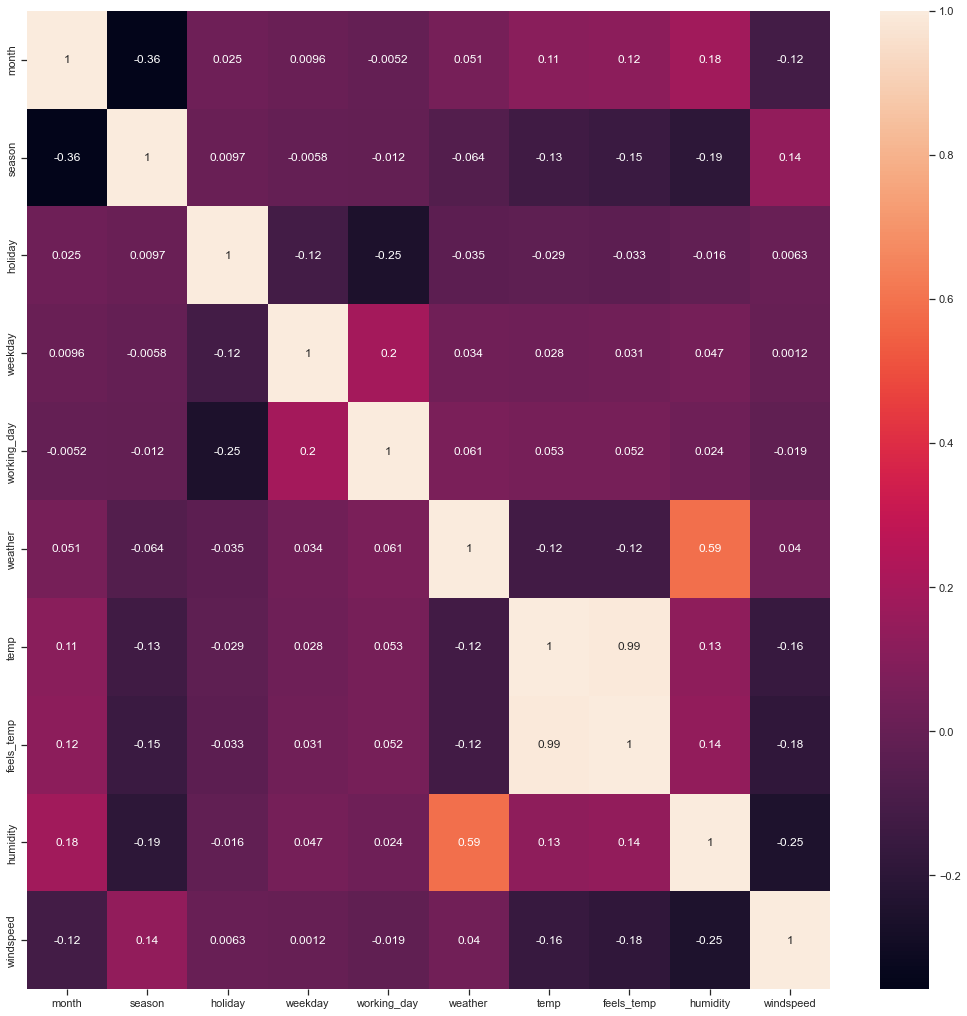

In [16]:
### Code here

plt.figure(figsize = (18, 18))
bike_rental_corr = bike_rental_X.corr()
sns.heatmap(bike_rental_corr, annot = True)

list(bike_rental_corr[abs(bike_rental_corr) >= 0.9].where(np.triu(np.ones(bike_rental_corr.shape), k = 1).astype(np.bool8)).stack().index)

In [17]:
bike_rental_X = bike_rental_X.drop(columns = ['feels_temp'])

In [18]:
### Comment here


**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [19]:
### Code here

bike_rental_X_dev, bike_rental_X_test, bike_rental_y_dev, bike_rental_y_test = train_test_split(bike_rental_X,
                                                                                          bike_rental_y,
                                                                                          test_size = 0.2, 
                                                                                          random_state = 0)
bike_rental_X_train, bike_rental_X_val, bike_rental_y_train, bike_rental_y_val = train_test_split(bike_rental_X_dev,
                                                                                          bike_rental_y_dev,
                                                                                          test_size = 0.25, 
                                                                                          random_state = 0)

**2.1.6 Standardize the columns in the feature matrices.**

In [20]:
### Code here

scaler_bike_rental= StandardScaler()
bike_rental_X_train = scaler_bike_rental.fit_transform(bike_rental_X_train)
bike_rental_X_val = scaler_bike_rental.transform(bike_rental_X_val)
bike_rental_X_test = scaler_bike_rental.transform(bike_rental_X_test)

In [21]:
#Adding a column of ones to the feature matrices for the bias term.

bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])


At the end of this pre-processing, you should have the following vectors and matrices: 
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [22]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        A = np.matmul(np.transpose(X), X) + self.alpha*np.identity(X.shape[1])
        b = np.matmul(np.transpose(X), y)
        self.w = np.linalg.solve(A, b)
        
        return None
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return np.matmul(X, self.w)
        

### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [23]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.
    
    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [24]:
### Code here

model_bike_rental = LinearRegression()
model_bike_rental.train(bike_rental_X_train, bike_rental_y_train)

bike_rental_y_train_pred = model_bike_rental.predict(bike_rental_X_train)
bike_rental_y_val_pred = model_bike_rental.predict(bike_rental_X_val)

# train model again on train + val (optional)
model_bike_rental.train(np.concatenate([bike_rental_X_train, bike_rental_X_val]), np.concatenate([bike_rental_y_train, bike_rental_y_val]))
bike_rental_y_test_pred = model_bike_rental.predict(bike_rental_X_test)

train_r2 = r2_score(bike_rental_y_train, bike_rental_y_train_pred)
val_r2 = r2_score(bike_rental_y_val, bike_rental_y_val_pred)
test_r2 = r2_score(bike_rental_y_test, bike_rental_y_test_pred)

print(f'R2 on Training: {train_r2}')
print(f'R2 on Validation: {val_r2}')
print(f'R2 on Testing: {test_r2}')

get_report(bike_rental_y_test_pred, bike_rental_y_test)

R2 on Training: 0.5592998060254909
R2 on Validation: 0.5570471824800078
R2 on Testing: 0.5145082467424861


,Prediction,Actual
Position,,
1,5578.554617,5923
2,6026.312503,4592
3,2594.554457,1248
145,5591.093383,5423
146,6579.298003,8294
147,5118.969811,4334


**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [25]:
### Code here

bike_rental_y_train_pred_baseline = np.full(bike_rental_X_train.shape[0], np.mean(bike_rental_y_train))
bike_rental_y_val_pred_baseline = np.full(bike_rental_X_val.shape[0], np.mean(bike_rental_y_train))
bike_rental_y_test_pred_baseline = np.full(bike_rental_X_test.shape[0], np.mean(bike_rental_y_train))

train_r2_baseline = r2_score(bike_rental_y_train, bike_rental_y_train_pred_baseline)
val_r2_baseline = r2_score(bike_rental_y_val, bike_rental_y_val_pred_baseline)
test_r2_baseline = r2_score(bike_rental_y_test, bike_rental_y_test_pred_baseline)

print(f'r2 on Training: {train_r2_baseline}')
print(f'r2 on Validation: {val_r2_baseline}')
print(f'r2 on Testing: {test_r2_baseline}')


df_r2 = pd.DataFrame({'Baseline r2': [train_r2_baseline, val_r2_baseline, test_r2_baseline],
                      'Regression Model r2': [train_r2, val_r2, test_r2]},
                      index = ['Train', 'Validation', 'Test'])

df_r2

r2 on Training: 0.0
r2 on Validation: -0.001323064015340547
r2 on Testing: -0.00018929600499140165


,Baseline r2,Regression Model r2
Train,0.000000,0.559300
Validation,-0.001323,0.557047
Test,-0.000189,0.514508


**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

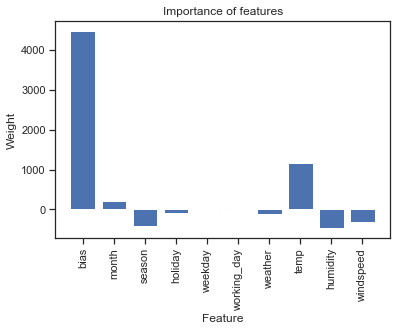

In [26]:
### Code here

plt.figure()
plt.bar(np.append(np.array(['bias']), bike_rental_X.columns), model_bike_rental.w)
plt.ylabel('Weight')
plt.xlabel('Feature')
plt.xticks(rotation = 90)
plt.title('Importance of features');

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

In [27]:
### Comment here


### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

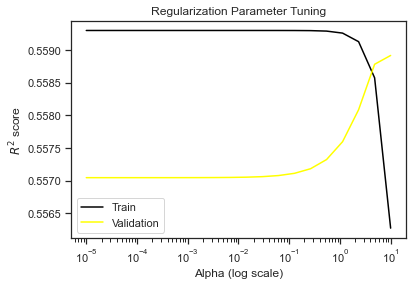

In [28]:
### Code here

alphas = np.logspace(-5, 1, 20)
cv_scores_train = []
cv_scores_val = []

for alpha in alphas:
    model_cv = LinearRegression(alpha=alpha)
    model_cv.train(bike_rental_X_train, bike_rental_y_train)
    cv_scores_train.append(r2_score(bike_rental_y_train, model_cv.predict(bike_rental_X_train)))
    cv_scores_val.append(r2_score(bike_rental_y_val, model_cv.predict(bike_rental_X_val)))

plt.plot(alphas, np.array(cv_scores_train), label = 'Train', color = 'Black')
plt.plot(alphas, np.array(cv_scores_val), label = 'Validation', color = 'yellow')
plt.xlabel('Alpha (log scale)')
plt.ylabel('$R^2$ score')
plt.title('Regularization Parameter Tuning')
plt.xscale('log')
plt.legend();

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [29]:
### Comment here


### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [30]:
### Code here

loan_data_df = pd.read_csv('loan_data.csv')
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [32]:
### Code here

loan_data_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
### Code here

loan_data_df = loan_data_df.dropna()

In [34]:
### Comment here


**2.2.3 Encode the categorical variables.**

In [35]:
### Code here

loan_data_df = pd.get_dummies(loan_data_df, 
                              columns=['Gender','Married','Education','Self_Employed','Property_Area', 'Dependents'], 
                              prefix=['Gender','Married','Education','Self_Employed','Property_Area', 'Dependents'])

loan_data_df['Loan_Status'].replace('Y',1,inplace=True)
loan_data_df['Loan_Status'].replace('N',0,inplace=True)

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [36]:
### Code here

labels = list(loan_data_df["Loan_Status"])
zero_prob = labels.count(0)/len(labels)
one_prob = labels.count(1)/len(labels)


print("Probability of a '0' Label: ", zero_prob)
print("Probability of a '1' Label: ", one_prob)

Probability of a '0' Label:  0.30833333333333335
Probability of a '1' Label:  0.6916666666666667


In [37]:
### Comment here

# No, it is not balanced, the chances of a loan to be approved is higher than it to be rejected.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

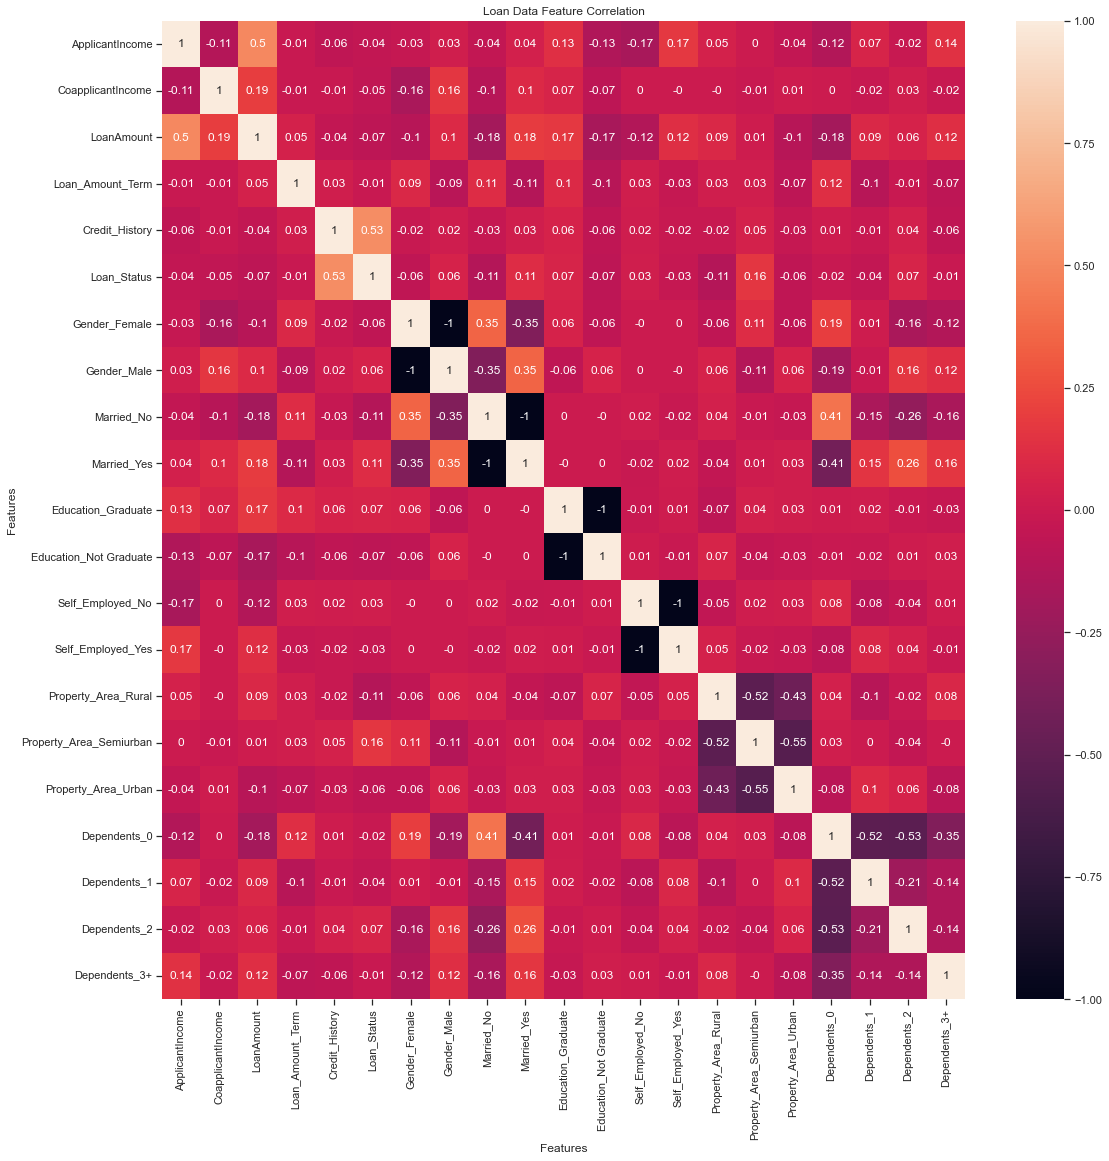

In [38]:
### Code here

plt.figure(figsize=(18,18))
loan_data_df_X = loan_data_df.drop(columns=['Loan_Status'])
loan_data_df_Y = loan_data_df['Loan_Status']

corr_matrix = loan_data_df.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.title("Loan Data Feature Correlation")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [39]:
### Code here

list(corr_matrix[abs(corr_matrix) >= 0.9].where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool8)).stack().index)

/var/folders/yr/pvzhzlb12ggccgzxtvy9vwjh0000gn/T/ipykernel_32944/319584892.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  list(corr_matrix[abs(corr_matrix) >= 0.9].where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool8)).stack().index)


[('Gender_Female', 'Gender_Male'),
 ('Married_No', 'Married_Yes'),
 ('Education_Graduate', 'Education_Not Graduate'),
 ('Self_Employed_No', 'Self_Employed_Yes')]

In [40]:
### Code here

loan_data_df = loan_data_df.drop(columns=['Gender_Male'])
loan_data_df = loan_data_df.drop(columns=['Married_No'])
loan_data_df = loan_data_df.drop(columns=['Education_Graduate'])
loan_data_df = loan_data_df.drop(columns=['Self_Employed_No'])

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [41]:
### Code here

loan_data_df_Y = np.reshape(loan_data_df_Y.values, (loan_data_df_Y.shape[0], 1))

loan_data_df_X_dev, loan_data_df_X_test, loan_data_df_Y_dev, loan_data_df_Y_test = train_test_split(loan_data_df_X, loan_data_df_Y, test_size = 0.2, random_state = 0)
loan_data_df_X_train, loan_data_df_X_val, loan_data_df_Y_train, loan_data_df_Y_val = train_test_split(loan_data_df_X_dev, loan_data_df_Y_dev,test_size = 0.25, random_state = 0)

scaler_loan = StandardScaler()
loan_data_df_X_train = scaler_loan.fit_transform(loan_data_df_X_train)
loan_data_df_X_val = scaler_loan.transform(loan_data_df_X_val)
loan_data_df_X_test = scaler_loan.transform(loan_data_df_X_test)

loan_data_df_X_train = np.hstack([np.ones((loan_data_df_X_train.shape[0], 1)), loan_data_df_X_train])
loan_data_df_X_val = np.hstack([np.ones((loan_data_df_X_val.shape[0], 1)), loan_data_df_X_val])
loan_data_df_X_test = np.hstack([np.ones((loan_data_df_X_test.shape[0], 1)), loan_data_df_X_test])


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [42]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

In [43]:
### Code here

type(loan_data_df_X_train)
loan_data_df_X_train.shape
loan_data_df_Y_train.shape

(288, 1)

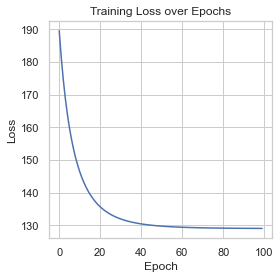

In [44]:
### Code here 

log_reg = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = log_reg.train(loan_data_df_X_train, loan_data_df_Y_train)

loss = np.reshape(loss, -1)

sns.set(rc = {'figure.figsize':(4, 4)}, style = 'whitegrid')
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs');

In [45]:
### Code here

np.random.seed(100)
alphas = np.random.uniform(0, 1, (20,))
etas = np.random.uniform(0, 0.001, (20,))
ts = np.random.randint(low = 0, high = 100, size = (20,))

val_losses = []

for i in range(20):
    log_reg_loop = LogisticRegression(alpha=alphas[i], eta=etas[i], t=ts[i])
    log_reg_loop.train(loan_data_df_X_train, loan_data_df_Y_train)
    val_losses.append(log_reg_loop.calculate_loss(loan_data_df_X_val, loan_data_df_Y_val))

val_losses = np.reshape(val_losses, (-1))
idx = np.argmin(val_losses)

alphas, etas, ts = alphas[idx], etas[idx], ts[idx]


In [46]:
alphas, etas, ts

(0.13670658968495297, 0.0007956625084732874, 83)

In [47]:
### Code here

log_reg = LogisticRegression(alpha=0, t=100, eta=1e-3)
log_reg.train(np.concatenate([loan_data_df_X_train, loan_data_df_X_val]), np.concatenate([loan_data_df_Y_train, loan_data_df_Y_val]))
preds = log_reg.predict(loan_data_df_X_test)
acc1 = np.count_nonzero(np.reshape((preds == loan_data_df_Y_test), (-1)))/len(loan_data_df_X_test)

log_reg_regularized = LogisticRegression(alpha = alphas, eta = etas, t = ts)
log_reg_regularized.train(np.concatenate([loan_data_df_X_train, loan_data_df_X_val]), np.concatenate([loan_data_df_Y_train, loan_data_df_Y_val]))
preds_regularized = log_reg_regularized.predict(loan_data_df_X_test)
acc2 = np.count_nonzero(np.reshape((preds_regularized == loan_data_df_Y_test), (-1)))/len(loan_data_df_X_test)

print(f'Test Accuracy for Logistic Regression without Regularizatioin: {acc1}')
print(f'Test Accuracy for Logistic Regression with Regularizatioin: {acc2}')

Test Accuracy for Logistic Regression without Regularizatioin: 0.75
Test Accuracy for Logistic Regression with Regularizatioin: 0.7708333333333334


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

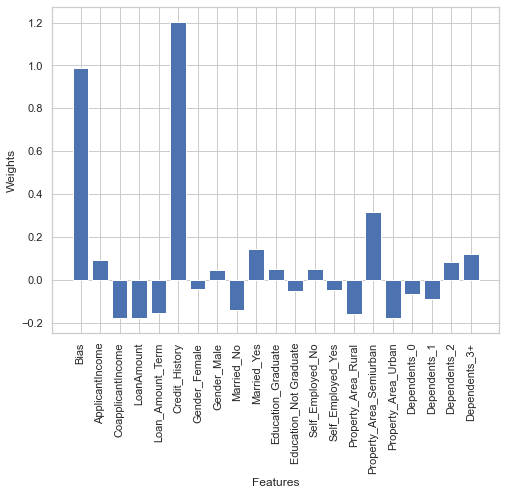

In [48]:
plt.figure(figsize = (8, 6))
plt.bar(x = np.concatenate([['Bias'],loan_data_df_X.columns]), height = log_reg_regularized.w.reshape((-1)))
plt.xlabel('Features')
plt.ylabel('Weights')
plt.xticks(rotation = 90);

In [49]:
### Comment here


### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [50]:
loan_data_df_Y_train = loan_data_df_Y_train.reshape((-1))
loan_data_df_Y_val = loan_data_df_Y_val.reshape((-1))
loan_data_df_Y_test = loan_data_df_Y_test.reshape((-1))


svm = LinearSVC()
svm.fit(loan_data_df_X_train, loan_data_df_Y_train)
print(f'Train Score: {svm.score(loan_data_df_X_train, loan_data_df_Y_train)}')
print(f'Validation Score: {svm.score(loan_data_df_X_val, loan_data_df_Y_val)}')

svm.fit(np.concatenate([loan_data_df_X_train,loan_data_df_X_val]), np.concatenate([loan_data_df_Y_train, loan_data_df_Y_val]))
print(f'Test Score: {svm.score(loan_data_df_X_test, loan_data_df_Y_test)}')



Train Score: 0.8055555555555556
Validation Score: 0.8645833333333334
Test Score: 0.7708333333333334


/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [51]:
svm_dual = SVC(kernel = 'linear')
svm_dual.fit(loan_data_df_X_train, loan_data_df_Y_train)
print(f'Train Score: {svm_dual.score(loan_data_df_X_train, loan_data_df_Y_train)}')
print(f'Validation Score: {svm_dual.score(loan_data_df_X_val, loan_data_df_Y_val)}')

svm_dual.fit(np.concatenate([loan_data_df_X_train,loan_data_df_X_val]), np.concatenate([loan_data_df_Y_train, loan_data_df_Y_val]))
print(f'Test Score: {svm_dual.score(loan_data_df_X_test, loan_data_df_Y_test)}')


Train Score: 0.8020833333333334
Validation Score: 0.8645833333333334
Test Score: 0.7708333333333334
